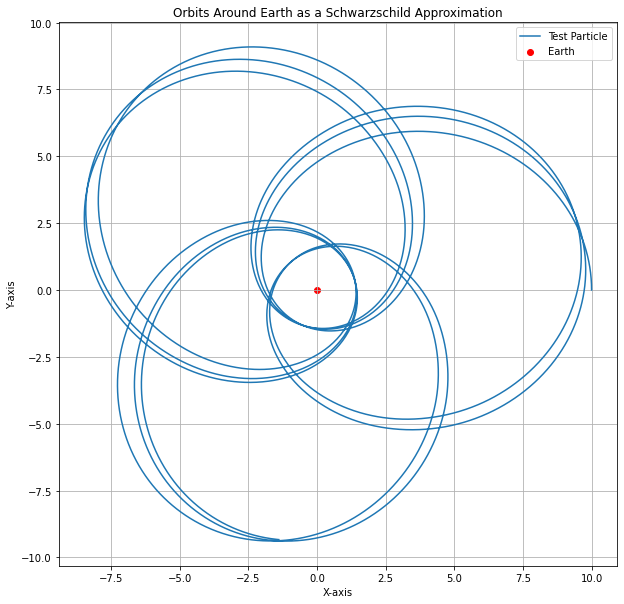

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Constants
M = 1
rs = 2 * M #schwz radius
#M = 6e24 #mass of earth
#c = 3e8
#G = 6.67e-11

#Eqns from: https://gyazo.com/2d543adeab47e72e6b6efa444b248161

#eff potential
#def effective_potential(r, pphi):
    #return (1 / 2) * (1 - rs / r) * ((pphi ** 2 / r ** 2) - 2 * M / r)

def effective_potential(r):
    return (1 - rs / r)

#derivs function
def derivs(t, y):
    r, phi, pr, pphi = y
    dr_dt = pr
    dphi_dt = pphi / (r ** 2)
    dpr_dt = -effective_potential(r) * pphi ** 2 / r ** 3 + rs * pr ** 2 / (2 * r ** 3)
    dpphi_dt = 0
    return [dr_dt, dphi_dt, dpr_dt, dpphi_dt]

#initial conditions
#r0 = 1.1 * rs #becomes circular
r0 = 5 * rs #whirlzoom?
#r0 = 25 * rs
phi0 = 0
pr0 = 0
pphi0 = np.sqrt((1 - rs / r0) * (r0 ** 2))
#pphi0 = 0 #limit testing
#pphi0 = 20

#time
#t_span = (0, 10000) #shows this might be wrong
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

initial_state = [r0, phi0, pr0, pphi0]

sol = solve_ivp(derivs, t_span, initial_state, method='RK45', t_eval=t_eval)

#plotting
x_values = sol.y[0] * np.cos(sol.y[1])
y_values = sol.y[0] * np.sin(sol.y[1])

plt.figure(figsize=(10, 10))
plt.title("Orbits Around Earth as a Schwarzschild Approximation")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.plot(x_values, y_values, label="Test Particle")
plt.scatter(0, 0, color='red', label="Earth")
plt.legend()
plt.grid(True)
plt.show()